# **Exploratory Data Analysis with SQL**




## Introduction

Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Store the dataset in database table

**it is highly recommended to manually load the table using the database console LOAD tool in DB2**.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload.png">

Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the  dataset, Next create a New Table, and then follow the steps on-screen instructions to load the data. Name the new table as follows:

**SPACEXDATASET**

**Follow these steps while using old DB2 UI which is having Open Console Screen**

**Note:While loading Spacex dataset, ensure that detect datatypes is disabled. Later click on the pencil icon(edit option).**

1.  Change the Date Format by manually typing DD-MM-YYYY and timestamp format as DD-MM-YYYY HH\:MM:SS.

    Here you should place the cursor at Date field and manually type as DD-MM-YYYY.

2.  Change the PAYLOAD_MASS\_\_KG\_  datatype  to INTEGER.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload2.png">


**Changes to be considered when having DB2 instance with the new UI having Go to UI screen**

*   Refer to this insruction in this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sign%20up%20for%20IBM%20Cloud%20-%20Create%20Db2%20service%20instance%20-%20Get%20started%20with%20the%20Db2%20console/instructional-labs.md.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">link</a> for viewing  the new  Go to UI screen.

*   Later click on **Data link(below SQL)**  in the Go to UI screen  and click on **Load Data** tab.

*   Later browse for the downloaded spacex file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/browsefile.png" width="800"/>

*   Once done select the schema andload the file.

 <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/spacexload3.png" width="800"/>


In [ ]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa
!pip install ipython-sql

### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**DB2 magic in case of old UI service credentials.**

In the next cell enter your db2 connection string. Recall you created Service Credentials for your Db2 instance before. From the **uri** field of your Db2 service credentials copy everything after db2:// (except the double quote at the end) and paste it in the cell below after ibm_db_sa://

<img src ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_edX/images/URI.jpg">

in the following format

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name**

**DB2 magic in case of new UI service credentials.**

<img src ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/images/servicecredentials.png" width=600>  

*   Use the following format.

*   Add security=SSL at the end

**%sql ibm_db_sa://my-username:my-password\@my-hostname:my-port/my-db-name?security=SSL**


In [ ]:
%sql ibm_db_sa://sny87009:YDniyl8UYvnV77d2@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb?security=SSL

In [ ]:
%sql SELECT * FROM SPACEXTBL LIMIT 12;

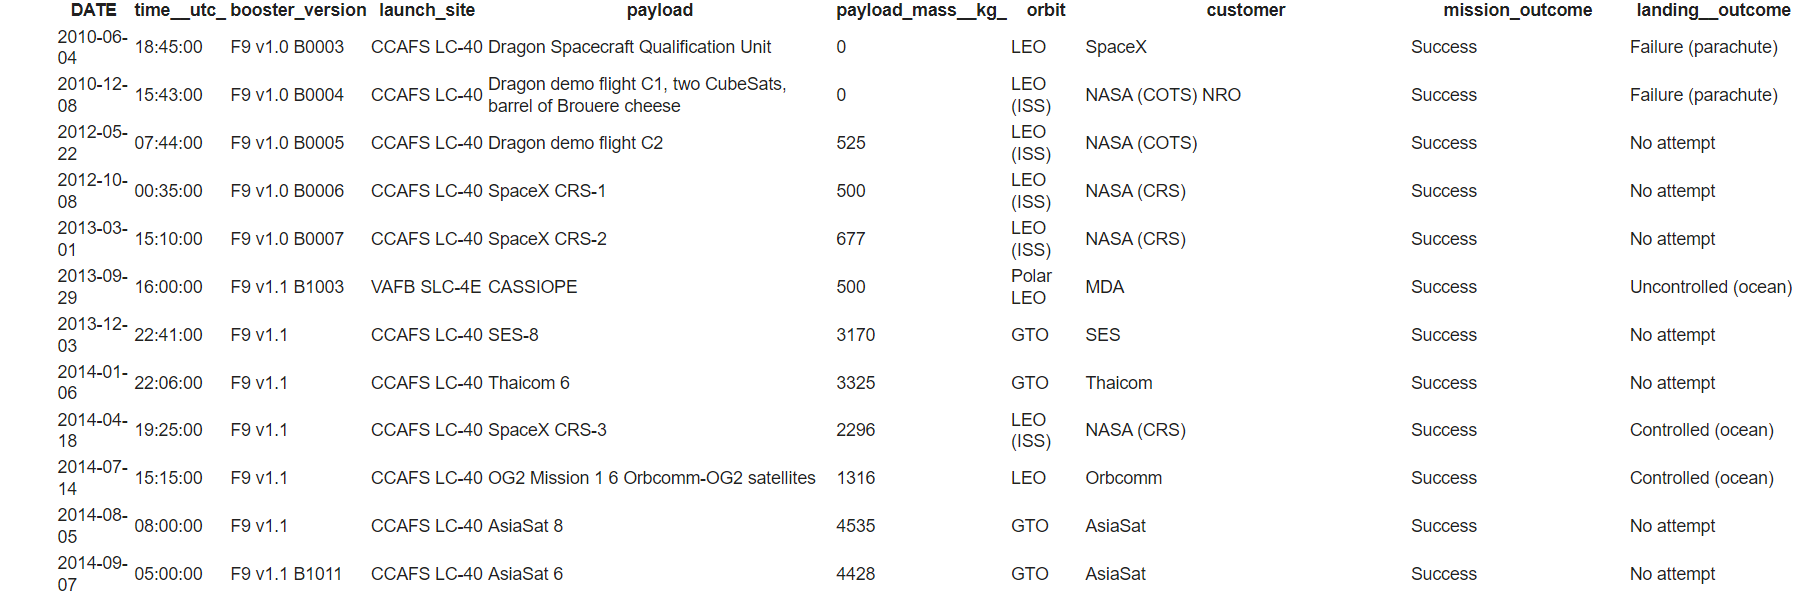

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

### Task 1

##### Display the names of the unique launch sites  in the space mission


In [ ]:
%sql SELECT DISTINCT LAUNCH_SITE FROM SPACEXTBL;

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


### Task 2

##### Display 5 records where launch sites begin with the string 'CCA'


In [ ]:
%sql SELECT LAUNCH_SITE from SPACEXTBL where (LAUNCH_SITE) LIKE 'CCA%' LIMIT 5;

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


launch_site
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


### Task 3

##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [ ]:
%sql SELECT SUM(PAYLOAD_MASS__KG_) FROM SPACEXTBL WHERE Customer = 'NASA (CRS)';

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


1
45596


### Task 4

##### Display average payload mass carried by booster version F9 v1.1


In [ ]:
%sql SELECT AVG(PAYLOAD_MASS__KG_) FROM SPACEXTBL WHERE Booster_Version LIKE 'F9 v1.0%';

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


1
340


### Task 5

##### List the date when the first successful landing outcome in ground pad was acheived.

*Hint:Use min function*


In [ ]:
%sql SELECT MIN(Date) FROM SPACEXTBL WHERE Landing__Outcome = 'Success (ground pad)';

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


1
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [ ]:
%sql SELECT BOOSTER_VERSION FROM SPACEXTBL WHERE LANDING__OUTCOME = 'Success (drone ship)' AND 4000 < PAYLOAD_MASS__KG_ < 6000;

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


booster_version
F9 FT B1021.1
F9 FT B1023.1
F9 FT B1029.2
F9 FT B1038.1
F9 B4 B1042.1
F9 B4 B1045.1
F9 B5 B1046.1


### Task 7

##### List the total number of successful and failure mission outcomes


In [ ]:
%sql SELECT MISSION_OUTCOME, COUNT(MISSION_OUTCOME) AS TOTAL_NUMBER FROM SPACEXTBL GROUP BY MISSION_OUTCOME;

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


mission_outcome,total_number
Failure (in flight),1
Success,99
Success (payload status unclear),1


### Task 8

##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [ ]:
%sql SELECT DISTINCT BOOSTER_VERSION FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_)FROM SPACEXTBL);

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


booster_version
F9 B5 B1048.4
F9 B5 B1048.5
F9 B5 B1049.4
F9 B5 B1049.5
F9 B5 B1049.7
F9 B5 B1051.3
F9 B5 B1051.4
F9 B5 B1051.6
F9 B5 B1056.4
F9 B5 B1058.3


### Task 9

##### List the failed landing_outcomes in drone ship, their booster versions, and launch site names for in year 2015


In [ ]:
%sql SELECT LANDING__OUTCOME, BOOSTER_VERSION, LAUNCH_SITE FROM SPACEXTBL WHERE Landing__Outcome = 'Failure (drone ship)' AND YEAR(DATE) = 2015;

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


landing__outcome,booster_version,launch_site
Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10

##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order


In [ ]:
%%sql
SELECT LANDING__OUTCOME, COUNT(LANDING__OUTCOME) AS TOTAL_NUMBER
FROM SPACEXTBL
WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY LANDING__OUTCOME
ORDER BY TOTAL_NUMBER DESC

 * ibm_db_sa://sny87009:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/bludb
Done.


landing__outcome,total_number
No attempt,10
Failure (drone ship),5
Success (drone ship),5
Controlled (ocean),3
Success (ground pad),3
Failure (parachute),2
Uncontrolled (ocean),2
Precluded (drone ship),1
